# Import Library

In [68]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
## Import Packages
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date,timedelta,datetime
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from dateutil.relativedelta import *

# example of training a final regression model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler


# Get Data

In [134]:

#Parameters
## Date
today = date.today()
firstmonth = today + relativedelta(months=+1)
firstmonth =  firstmonth+relativedelta(day=1)
lastmonth = today + relativedelta(months=+2)
lastmonth =  lastmonth+relativedelta(day=1)
firstmonth = firstmonth.strftime("%Y-%m-%d")
lastmonth = lastmonth.strftime("%Y-%m-%d")
## Airbnb Page
page = requests.get("https://www.airbnb.fr/s/Acapulco--Mexique/homes?adults=1&refinement_paths%5B%5D=%2Fhomes&checkin="+firstmonth+"&checkout="+lastmonth+"&flexible_trip_dates%5B%5D=june&flexible_trip_dates%5B%5D=may&flexible_trip_lengths%5B%5D=weekend_trip&date_picker_type=calendar&click_referer=t%3ASEE_ALL%7Csid%3A9697aa3c-ab8b-43c2-ab38-348402f77282%7Cst%3AHOME_GROUPING_FLEXIBLE_DATES&flexible_date_search_filter_type=0&title_type=NONE&search_type=pagination&tab_id=home_tab&ne_lat=16.931993582281493&ne_lng=-99.37419621313472&sw_lat=16.434084058683805&sw_lng=-100.07663456762691&zoom=11&search_by_map=true&place_id=ChIJyVDOroVXyoUR46SQivfYAZg&federated_search_session_id=251bdd36-3fe8-40af-9424-990ab890ca12&items_offset=0&section_offset=3")
soup = BeautifulSoup(page.content,'html.parser')
airbnbpage = soup.find_all('div',class_='_1h559tl')
airbnbpg = airbnbpage[0].text
airbnbpg = airbnbpg[4:6]
airbnbpg = int(airbnbpg)
## List initialization
pricelist,namelist,travellerlist,roomlist,bedlist,sdblist = [],[],[],[],[],[]
option1list,option2list,option3list,option4list = [],[],[],[]

# Web Scrapping for all the pages
for pages in range(0, 25*airbnbpg, 25):
    # Web scrapping request
    page = requests.get("https://www.airbnb.fr/s/Acapulco--Mexique/homes?adults=1&refinement_paths%5B%5D=%2Fhomes&checkin="+firstmonth+"&checkout="+lastmonth+"&flexible_trip_dates%5B%5D=june&flexible_trip_dates%5B%5D=may&flexible_trip_lengths%5B%5D=weekend_trip&date_picker_type=calendar&click_referer=t%3ASEE_ALL%7Csid%3A9697aa3c-ab8b-43c2-ab38-348402f77282%7Cst%3AHOME_GROUPING_FLEXIBLE_DATES&flexible_date_search_filter_type=0&title_type=NONE&search_type=pagination&tab_id=home_tab&ne_lat=16.931993582281493&ne_lng=-99.37419621313472&sw_lat=16.434084058683805&sw_lng=-100.07663456762691&zoom=11&search_by_map=true&place_id=ChIJyVDOroVXyoUR46SQivfYAZg&federated_search_session_id=251bdd36-3fe8-40af-9424-990ab890ca12&items_offset="+str(pages)+"&section_offset=3")
    # SOUP
    soup = BeautifulSoup(page.content,'html.parser')
    airbnbdata = soup.find_all('div',class_='_gig1e7')
    i = 0
    while i < len(airbnbdata):
        j=0
        #Name 
        nameairbnb = airbnbdata[i].find('span',class_='_1whrsux9').text
        namelist.append(nameairbnb)
        #Price
        priceairbnb = airbnbdata[i].find('span',class_='_krjbj').text
        pricelist.append(priceairbnb)
        #Place Data
        place = airbnbdata[i].find_all('div',class_='_kqh46o')[0]
        place2 = airbnbdata[i].find_all('div',class_='_kqh46o')[1]
        #Traveller
        traveller = place.find_all('span')[0].text
        travellerlist.append(traveller)
        room = place.find_all('span')[2].text
        roomlist.append(room) 
        bed = place.find_all('span')[4].text
        bedlist.append(bed)
        try:
            sdb = place.find_all('span')[6].text
            sdblist.append(sdb)
        except:
            sdblist.append(0)
            pass
        #Options
        option1 = place2.find_all('span')[0].text
        option1list.append(option1)
        try:
            option2 = place2.find_all('span')[2].text
            option2list.append(option2) 
        except:
            option2list.append(0)
        try:
            option3 = place2.find_all('span')[4].text
            option3list.append(option3)
        except:
            option3list.append(0)
        try:
            option4 = place2.find_all('span')[6].text
            option4list.append(option4)
        except:
            option4list.append(0)


        i += 1

# Dataframe        
df_month = pd.DataFrame({"Title":namelist,
                   "Traveller":travellerlist,
                   "Room":roomlist,
                   "Bed":bedlist,
                   'Bathroom':sdblist,
                   'Piscine1':option1list,
                   'Wifi1':option2list,
                   'Climatisation1':option3list,
                   'Cuisine1':option4list,
                   'Price':pricelist
                  })

#Take first letter and change data type
df_month['Traveller'] = df_month['Traveller'].astype(str).str[0]
df_month['Traveller'] = pd.to_numeric(df_month['Traveller'])
df_month['Room'] = df_month['Room'].astype(str).str[0]
#Check if No bed but only Studio
df_month['Room'] = df_month['Room'].str.replace('S','0')
df_month['Room'] = pd.to_numeric(df_month['Room'])
df_month['Bed'] = df_month['Bed'].astype(str).str[0]
df_month['Bed'] = pd.to_numeric(df_month['Bed'])
#Erase useless space
df_month['Price'] = df_month['Price'].str.split(" ", n = 1, expand = True)
df_month.loc[df_month['Price'].str.len() == 6 , 'Price']  = df_month['Price'].str[0] +df_month['Price'].str[2:]
df_month.loc[df_month['Price'].str.len() == 7 , 'Price']  = df_month['Price'].str[:1] +df_month['Price'].str[3:]
df_month['Price'] = df_month['Price'].astype(str).str[:-1]
df_month['Price'] = pd.to_numeric(df_month['Price'])

#Check if half bathroom
df_month.loc[df_month['Bathroom'].str[2] == 's', 'Bathroom']  = df_month['Bathroom'].str[0]
df_month.loc[df_month['Bathroom'].str[2] == ' ', 'Bathroom']  = df_month['Bathroom'].str[:1]
df_month.loc[df_month['Bathroom'].str[2] == '5', 'Bathroom']  = df_month['Bathroom'].str[:3]
df_month['Bathroom'] = df_month['Bathroom'].str.replace(',','.')
df_month['Bathroom'] = pd.to_numeric(df_month['Bathroom'])
    
#Check Options
#Piscine column
df_month.loc[df_month['Piscine1'] == 'Cuisine', 'Cuisine1']  = 'Cuisine'
df_month.loc[df_month['Piscine1'] == 'Climatisation', 'Climatisation1']  = 'Climatisation'
df_month.loc[df_month['Piscine1'] == 'Wifi', 'Wifi1']  = 'Wifi'
#Wifi Column
df_month.loc[df_month['Wifi1'] == 'Cuisine', 'Cuisine1']  = 'Cuisine'
df_month.loc[df_month['Wifi1'] == 'Climatisation', 'Climatisation1']  = 'Climatisation'
#Clim column
df_month.loc[df_month['Climatisation1'] == 'Cuisine', 'Cuisine1']  = 'Cuisine'

#Change to dummy
df_month.loc[df_month['Piscine1'] == 'Piscine', 'Piscine']  = 1
df_month.loc[df_month['Piscine1'] != 'Piscine', 'Piscine']  = 0
df_month.loc[df_month['Wifi1'] == 'Wifi', 'Wifi']  = 1
df_month.loc[df_month['Wifi1'] != 'Wifi', 'Wifi']  = 0
df_month.loc[df_month['Climatisation1'] == 'Climatisation', 'Climatisation']  = 1
df_month.loc[df_month['Climatisation1'] != 'Climatisation', 'Climatisation']  = 0
df_month.loc[df_month['Cuisine1'] == 'Cuisine', 'Cuisine']  = 1
df_month.loc[df_month['Cuisine1'] != 'Cuisine', 'Cuisine']  = 0

#Drop Useless Columns
df_month = df_month.drop(columns=['Piscine1','Wifi1','Climatisation1','Cuisine1'])
#Reorder Columns
df_month = df_month[['Title','Traveller','Room','Bed','Bathroom','Piscine','Wifi','Climatisation','Cuisine','Price']]
#If NaN
df_month = df_month.fillna(0)
df_month = df_month.loc[df_month['Price'] < 10000]



# Check Data

In [154]:
train_dataset = df_month.sample(frac=0.8, random_state=0)
train_dataset = train_dataset[['Traveller','Room','Bed','Bathroom','Piscine','Wifi','Climatisation','Cuisine','Price']]
test_dataset = df_month.drop(train_dataset.index)
test_dataset = test_dataset[['Traveller','Room','Bed','Bathroom','Piscine','Wifi','Climatisation','Cuisine','Price']]
train_labels = train_dataset.pop('Price')
test_labels = test_dataset.pop('Price')

In [140]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

def build_model():
  model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


In [155]:
train_dataset.describe().transpose()[['mean', 'std','min','25%','50%','75%','max']]

     Traveller  Room  Bed  Bathroom  Piscine  Wifi  Climatisation  Cuisine
0            4     1    3       1.0      1.0   0.0            1.0      0.0
9            2     1    0       1.0      1.0   1.0            0.0      1.0
23           5     2    4       2.0      1.0   1.0            1.0      1.0
28           5     3    6       2.5      1.0   1.0            1.0      1.0
42           5     2    3       2.0      1.0   1.0            1.0      1.0
..         ...   ...  ...       ...      ...   ...            ...      ...
534          6     2    4       2.0      1.0   1.0            1.0      1.0
537          6     1    4       1.0      1.0   0.0            1.0      0.0
547          6     2    4       2.0      1.0   1.0            1.0      1.0
551          6     2    3       2.0      1.0   1.0            1.0      1.0
559          3     0    2       1.0      0.0   1.0            0.0      1.0

[113 rows x 8 columns]


# Train Data

In [142]:
# define the keras model
model = build_model();
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_15 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [143]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[early_stop,PrintDot()])


....................................................................................................
..............................................................................

In [144]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
173,461773.46875,465.087311,461773.46875,574565.1250,510.828217,574565.1250,173
174,461416.03125,465.026733,461416.03125,574598.2500,511.346527,574598.2500,174
175,460889.71875,465.570801,460889.71875,575008.3750,511.503784,575008.3750,175
176,460293.84375,464.859589,460293.84375,575462.4375,511.709320,575462.4375,176
177,459599.71875,464.511169,459599.71875,575269.4375,512.161865,575269.4375,177


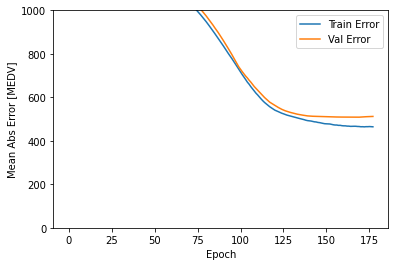

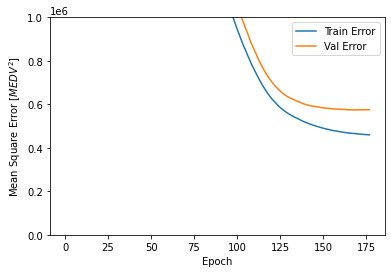

In [145]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MEDV]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,1000])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MEDV^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,1000000])
  plt.legend()
  plt.show()


plot_history(history)

In [146]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MEDV".format(mae))

4/4 - 0s - loss: 464677.8750 - mae: 476.1070 - mse: 464677.8750
Testing set Mean Abs Error: 476.11 MEDV


# Prediction

In [172]:
normed_test_data = norm(test_dataset)
test_predictions = model.predict(normed_test_data).flatten()
rounded = [np.round(x) for x in test_predictions]
result = pd.DataFrame({"Prediction":test_predictions,
                       "Reality":test_labels.values,
                       "Difference":test_labels.values - test_predictions})
result.Prediction = round(result.Prediction,2)
result = result.round(2)
print(result)
#print('Prediction : ',test_predictions,' VS Reality', test_labels.values)

      Prediction  Reality  Difference
0     231.630005      555      323.37
1     815.869995      154     -661.87
2    1384.560059     1304      -80.56
3    1863.949951      871     -992.95
4    1360.689941      933     -427.69
..           ...      ...         ...
108  1426.380005     1735      308.62
109   148.889999     1078      929.11
110  1426.380005     1151     -275.38
111  1370.530029     2730     1359.47
112   779.900024      797       17.10

[113 rows x 3 columns]


In [174]:
print(sum(abs(result.Difference)))

53800.13000000001


In [171]:
#Insert your appartment
X_pred = pd.DataFrame({"Traveller":4,
                   "Room":4,
                   "Bed":3,
                   'Bathroom':2,
                   'Piscine':1,
                   'Wifi':1,
                   'Climatisation':1,
                   'Cuisine':1}, index=[0]
                     )
normed_test_data = norm(X_pred)
predictions = model.predict(normed_test_data).flatten()

print(predictions)

[1502.2943]


# Optimization

In [ ]:
best = 0
best_layer1,best_layer2 = [],[]
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

def build_model(layer1,layer2):
  model = keras.Sequential([
    layers.Dense(layer1, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(layer2, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

# define the keras model
for i in range(10,40):
    for j in range(10,40):
        model = build_model(i,j);
        #model.summary()
        EPOCHS = 1000
        # The patience parameter is the amount of epochs to check for improvement
        early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

        history = model.fit(
          normed_train_data, train_labels,
          epochs=EPOCHS, validation_split = 0.2, verbose=0,
          callbacks=[early_stop])

        normed_test_data = norm(test_dataset)
        test_predictions = model.predict(normed_test_data).flatten()
        rounded = [np.round(x) for x in test_predictions]
        result = pd.DataFrame({"Prediction":test_predictions,
                               "Reality":test_labels.values,
                               "Difference":test_labels.values - test_predictions})
        result.Prediction = round(result.Prediction,2)
        result = result.round(2)
        result = sum(abs(result.Difference))
        if best > result or best == 0:
            best = result
            print('Layer1', i , 'Layer2', j , ' Test result differences ', round(best,2))
            best_layer1.append(i)
            best_layer2.append(j)

Layer1 10 Layer2 10  Test result differences  50478.34
Layer1 10 Layer2 12  Test result differences  49724.02
Layer1 10 Layer2 13  Test result differences  48798.63


In [190]:
model = build_model(best_layer1[-1],best_layer2[-1])

19
[0.33671355]


In [177]:
#Insert your appartment
X_pred = pd.DataFrame({"Traveller":4,
                   "Room":4,
                   "Bed":3,
                   'Bathroom':2,
                   'Piscine':1,
                   'Wifi':1,
                   'Climatisation':1,
                   'Cuisine':1}, index=[0]
                     )
normed_test_data = norm(X_pred)
predictions = model.predict(normed_test_data).flatten()

print(predictions)

,Prediction,Reality,Difference
0,680.289978,555,-125.29
1,971.219971,154,-817.22
2,1403.199951,1304,-99.20
3,1771.140015,871,-900.14
4,1422.989990,933,-489.99
...,...,...,...
108,1446.219971,1735,288.78
109,506.399994,1078,571.60
110,1446.219971,1151,-295.22
111,1442.430054,2730,1287.57
